# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #Импортируем библиотеку Pandas
import numpy as np
import matplotlib.pyplot as plt
#Считываем данные и сохраняем в переменную data, указав в качестве разделителя знак табуляции \t
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Выводим первые 10 строк датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим информацию о датафрейме с помощью метода `info()`

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрев информацию о датафрейме, можно задаться вопросами:
- в 14 из 22 столбцов есть пропуски, необходимо разобраться как их заполнить, если это возможно;
- типы данных некоторых столбцов необходимо будет заменить.

Построим таблицу со сводной статистикой для числовых данных:

In [3]:
data_analysis = data.describe()
data_analysis

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видно, что:
- у некоторых столбцов есть сильное различие среднего значения от медианного значения, что может говорить о наличии выбросов (например: `last_price`, `days_exposition`);
- есть очень странные максимальные значения (например в `ceiling_height` есть высота потолка в 100 метров) и минимальные значения (например расстояние до аэропорта `airports_nearest` есть 0 метров)

Построим гистограмму для всех числовых столбцов датафрема на одном графике

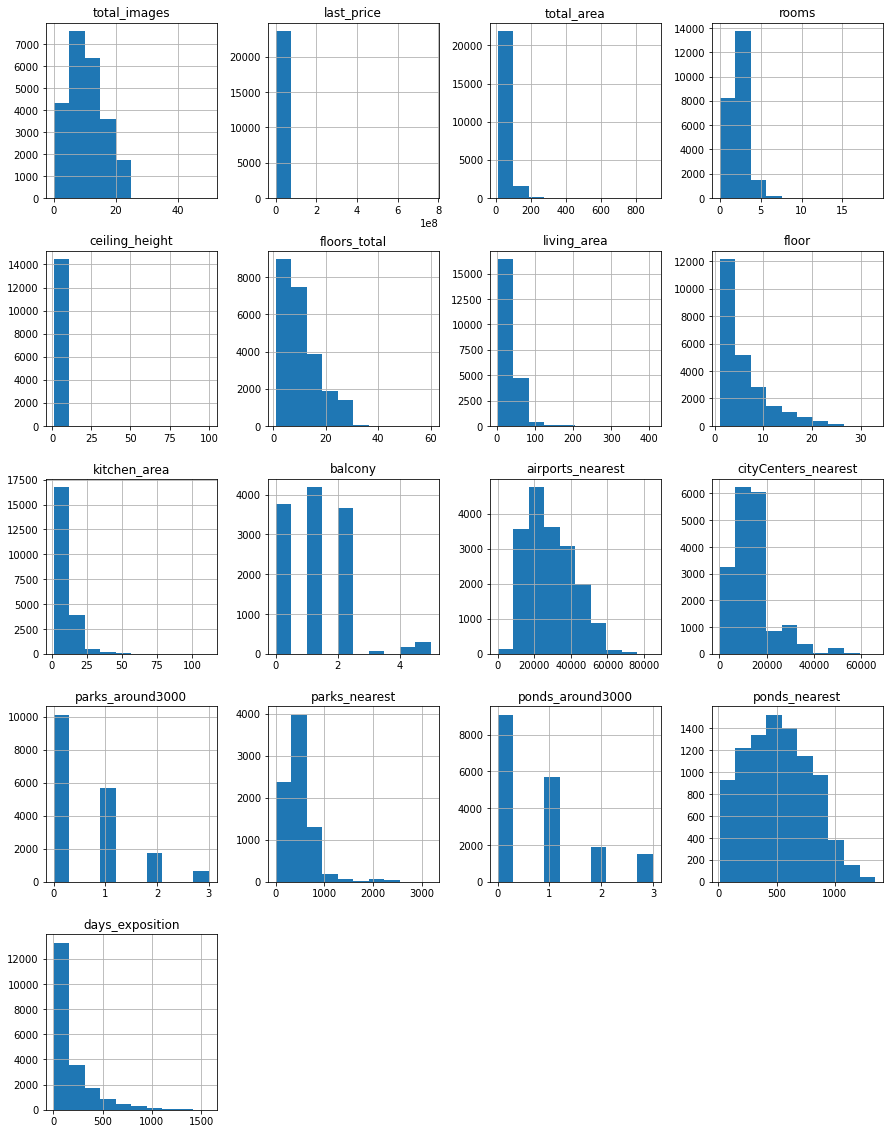

In [4]:
data.hist(figsize=(15, 20))
plt.show()

По гистограммам можно сделать первые выводы:
- `total_images` видно, что в основной массе фотографий в объявлении от 0 до 24, больше 24 лишь у единичных объявлений;
- `last_price` видно, что вся масса квартир стоит до 70 млн. рублей, и есть квартиры стоимостью до 800 млн. рублей;
- `total_area` видно, что в основном площадь квартир до 200 кв. метров, но есть и квартиры площадью до 900 кв. метров;
- `room` видно, что в основном до 5 комнат в квартирах, но есть квартиры и с 20 команатми;
- `ceiling_height` видно, что потолки в основном до 10 метров, но есть и 100 метровые потолки (ошибка?);
- `floors_total` видно, что квартиры в основном в домах до 30 этажей и лишь часть в домох до 60 этажей;
- `living_area` видно, что квартиры в основном площадью до 100 кв. метров, и малая часть площадью до 40 кв. метров;
- `kitchen_area` видно, что кухня в основном до 25 квадратов и несколько квартис с плозщадью кухни более 25 кв. метров;
- `balcony` видно, что в основной массе в квартирах до 2 балконов, но есть и квартиры с 3 и более балконов;
- `airports_nearest` видно, что основная масса квартир находится в 10 - 60 км от аэропрта;
- `cityCenters_nearest` видно, что в основном квартиры находятся в пределах 20 км от центра;
- `parks_around3000` видно, что половина квартир находится дальше 3 км от парков;
- `parks_nearest` видно, что если есть парк рядом с вкартирой, то он в основном в пределах километра;
- `ponds_around3000	` видно, что в большей половине квартир есть 1 и более прудов в пределах 3 км;
- `ponds_nearest` видно, что все пруды не дальше 1,5 км от домов, а большая их часть в 0,5 км;
- `days_exposition` видно, что значительная часть объявлений снималась до 150 дней. 

## Предобработка данных

### Переименование столбцов

Для красоты изменим название столбца `cityCenters_nearest` на `city_centers_nearest`:

In [5]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

### Заполнение пропусков

Для начала попробуем разобраться в пропусках и заполнить их.

In [6]:
data.isna().sum() #находим количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим еще на долю пропущенных значений:

In [7]:
data.isnull().mean() * 100 # находим долю пропущенных значений для каждого столбца

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Чтобы разобраться как заполнять пропуски в количественных переменных, построим матрицу корреляции

In [8]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Всех больше пропусков в столбце `is_apartment`, скорее всего его просто не заполняли, так как квартиры не являются апартоментами, отсюда и пропуски, можно заполнить пропуски значением `False`:

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False) # Заполняем пропуски значением False

Много пропусков в столбце `balcony`, скорее всего там и нет балконов раз не указали их количество, можно заполнить пропуски 0:

In [10]:
data['balcony'] = data['balcony'].fillna(0) # Заполняем пропуски значением 0

Займемся пропусками в `floors_total`, их 86, скорее всего просто при заполнении забыли заполнить этот столбец. Судя по коэффициенту корреляции, самая большая зависимость у `floors_total` от `floor`, заполним пустые ячейки медианным значением количества этажей дома среди строк с текущим этажом, т. е. если у квартиры на 1 этаже нет этажности дома, то подставится медианное значение этажности всех квартир, которые расположены на 1 этаже.

In [11]:
# Перебираем каждый этаж в наборе уникальных значений столба floor
for i in data['floor'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,в которых в floor текущий этаж i и есть пропуски в floors_total 
    data.loc[(data['floor'] == i) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['floor'] == i), 'floors_total'].median()
    # и записываем в них медианное значение floors_total среди строк с текущим этажом i

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `ceiling_height` много пропусков, скорее всего, продавцы просто пропускали этот пункт. Заполним пропуски в `ceiling_height` медианным значением высоты потолков, исходя из высоты дома `floors_total` (грубо говоря во всех пятиэтажках скорее всего одинаковая высота потолков).

In [13]:
# Было: data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

```
# Первая доработка
# Перебираем все многоэтажки в наборе уникальных значений столба floors_total
    for i in data['floors_total'].unique():
        # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых в ceiling_height количество этажей i 
        # и есть пропуски в ceiling_height и записываем в них медианное значение ceiling_height для дома i-этажного дома,
        # если оно не равно пустому значению
        if data.loc[data['floors_total'] == i, 'ceiling_height'].median() == np.NaN:
            data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
            data.loc[data['floors_total'] == i, 'ceiling_height'].median()
        else:
            data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
            data['ceiling_height'].median()
            # и записываем в них медианное значение ceiling_height для i-этажного дома
```

In [14]:
# вторая доработка
for i in data['floors_total'].unique():
        # на каждом шаге цикла с помощью атрибута loc выбираем строки, в которых в ceiling_height количество этажей i 
        # и есть пропуски в ceiling_height и записываем в них медианное значение ceiling_height для дома i-этажного дома
        data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[data['floors_total'] == i, 'ceiling_height'].median()
        # и записываем в них медианное значение ceiling_height для i-этажного дома

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Пропуски в `living_area` будем заполнять из среднего отношения `living_area` к `total_area` исходя из количества комнат:

In [15]:
# Перебираем все количества комнат в наборе уникальных значений столба rooms
for i in data['rooms'].unique():
    # ищем коэффициент отношения living_area к total_area для каждого количества комнат
    kof = data.loc[(data['rooms'] == i), 'living_area'].median()/data.loc[(data['rooms'] == i), 'total_area'].median()
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,в которых в rooms количество комнат i 
    # и есть пропуски в living_area
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'total_area'] * kof
    # и записываем в них медианное значение total_area умноженное на коэффициент для i комнат

Для `kitchen_area` проведем подобные операции для заполнения пропусков, как в предыдущей ячейке, но сначала заполним нулями значения для строк с нулевым значением комнат (если нет комнат, то и площадь кухни не определить):

In [16]:
# с помощью атрибута loc выбираем строки,в которых в rooms количество комнат 0 и есть пропуски в kitchen_area, и заполняем их нулем
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

Теперь по аналогии с  пропусками в `living_area` заполняем пропуски в `kitchen_area`:

In [17]:
# Перебираем все количества комнат в наборе уникальных значений столба rooms
for i in data['rooms'].unique():
    # ищем коэффициент отношения kitchen_area к total_area для каждого количества комнат
    kof = data.loc[(data['rooms'] == i), 'kitchen_area'].median()/data.loc[(data['rooms'] == i), 'total_area'].median()
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,в которых в rooms количество комнат i 
    # и есть пропуски в kitchen_area
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'total_area'] * kof
    # и записываем в них медианное значение total_area умноженное на коэффициент для i комнат

Пропуски в `locality_name` заполним значением "Город не определен"

In [18]:
data['locality_name'] = data['locality_name'].fillna('Город не определен') # Заполняем пропуски значением 'Гороод не определен'

Посмотрим, где есть пропуски в столбцах от `airports_nearest` до `ponds_nearest`:

In [19]:
# Делаем срез датасета с пропусками в столбцах  от `airports_nearest` до `ponds_nearest`
data.query('airports_nearest.isna() \
           & city_centers_nearest.isna() \
           & parks_around3000.isna() \
           & parks_nearest.isna() \
           & ponds_around3000.isna() \
           & ponds_nearest.isna() \
           ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.430000,26,False,...,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,15.789934,2,False,...,8.110284,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.700000,1,False,...,9.414340,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Срез получился 5518 строк, видимо при формировании автоматических значений на основе картографических данных произошел сбой, заполнять данные в этих столбцах будет не корректно, т. к. сложно будет предположить расстояние и количество прудов или парков.

Пропущенные значения в `days_exposition` заполнить также не получится, ведь не зная, когда объявление сняли, посчитать количество дней сколько было размещено объявление не получится.

Заменить тип на `int` в столбцах `parks_around3000`, `ponds_around3000`, `days_exposition` не получится т.к. там остаются пропуски.

Проверим как изменилось количество пропусков после преобразований:

In [20]:
data.isna().sum() # находим количество пропущенных значений для каждого столбца после заполнений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски остались только в тех столбцах в которых их сложно заполнить корректно

### Обработка аномальных значений

По гистограмме всех числовых значений в датасете, видно что в столбце `ceiling_height` есть значения до 100 метров, посмотрим какие уникальные значения есть в столбце: 

In [21]:
# Выводим список уникальных значений столбца ceiling_height в порядке возрастания
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Видно, что есть значения не очень похожие на правду, видимо продавцы обшиблись при вводе данных, будем считать, что нормальная высота потолков от 2,2 м до 8.3 м, остальные значения заменим на медианное значение, а значения от 22,6 м до 32 поделим на 10, возможно там просто указали высоту в дм: 

In [22]:
# Создадим список со значениями, которые нужно заменить на медианные
erroneous_ceiling_height = [1, 1.2, 1.75, 2, 10.3, 14,  14.85, 20, 100, np.NaN]
# на каждом шаге цикла с помощью атрибута loc выбираем строки,в которых в ceiling_height высота потолка i 
for i in erroneous_ceiling_height:
    # сначала заменяем аномальные значения на пропуск
    data.loc[data['ceiling_height'] == i, 'ceiling_height'] = np.NaN
    # заполняем пропуски медианным значением
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [23]:
# заменяем значения в столбце ceiling_height которые больше 22.6 на них же, но деленные на 10
data.loc[data['ceiling_height'] >= 22.6, 'ceiling_height'] = data['ceiling_height'] / 10

### Обработка дубликатов

Займемся значениями в столбце `locality_name`, посмотрим на уникальные значения столбца:

In [24]:
# Выводим список уникальных значений столбца locality_name в порядке возрастания
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Город не определен', 'Зеленогорск',
       'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск',
       'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
  

Видно, что есть разные написания одного и того же населенного пункта (поселок ... или посёлок, городской поселок ... или поселок городского типа), заменим различные названия на одно, а букву `ё` на `е`:

In [25]:
data['locality_name'] = (
    data['locality_name']
    # заменяем ё на е
    .str.replace('ё', 'е')
    # заменяем различные написания поселка
    .replace(['городской поселок', 'поселок городского типа', 'поселок при железнодорожной'], 'поселок', regex=True)
)

Проверим есть ли явные дубликаты в датафрейме:

In [26]:
data.duplicated().sum()

0

Дубликатов нет.

### Замена типов данных

Заменим тип данных столбца `first_day_exposition` на `datetime`, т.к. это столбец с датой:

In [27]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

Заменим тип данных столбцов `is_apartment`, `studio`, `open_plan`, `locality_name` на `category`, т.к. это категориальные переменные:

In [28]:
data[['is_apartment', 'studio', 'open_plan', 'locality_name']] = \
data[['is_apartment', 'studio', 'open_plan', 'locality_name']].astype('category')

Заменим тип данных столбцов `last_price`, `balcony`, `floors_total` на `int`, т.к. это целочисленные величины:

In [29]:
data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].astype('int')

## Посчитайте и добавьте в таблицу новые столбцы

Для проведения исследовательского анализа, необходимо добавить несколько дополнительных столбцов, первый будет цена за 1 квадратный метр `price_m2`:

In [30]:
# Добавляем столбец price_m2, равный отношению last_price к total_area (зададим тип данных int)
data['price_m2'] = (data['last_price'] / data['total_area']).astype('int')

Добавим столбцы `weekday_exposition`, `month_exposition`, `year_exposition` отражающие день недели, месяц и год публикации объявления:

In [31]:
# Добавляем столбец weekday_exposition, соответствующий дню недели в дате first_day_exposition (зададим тип данных int)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.astype('int')
# Добавляем столбец month_exposition, соответствующий месяцу в дате first_day_exposition (зададим тип данных int)
data['month_exposition'] = data['first_day_exposition'].dt.month.astype('int')
# Добавляем столбец year_exposition, соответствующий году в дате first_day_exposition (зададим тип данных int)
data['year_exposition'] = data['first_day_exposition'].dt.year.astype('int')

Добавим столбец `category_floor` с типом этажа квартиры (значения — «первый», «последний», «другой»):

In [32]:
# Создадим функцию, которая добавит столбец 'category_floor' и применим ее к датафрейму `data` 
def category_floor(floor, floors_total):
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        return 'Ошибка'
data['category_floor'] = data.apply(lambda x: category_floor(x.floor, x.floors_total), axis=1).astype('category')

Добавим столбец `cityCenters_nearest_km`, отображающий расстояние до центра города в километрах:

In [33]:
# добавим столбец cityCenters_nearest_km, соответсвующий значению cityCenters_nearest деленого на 1000
try:
    data['city_сenters_nearest_km'] = round(data['city_centers_nearest'] / 1000)
except:
    pass

## Проведите исследовательский анализ данных

### Анализ отдельных параметров

Посмотрим на сводную статистику для числовых данных, которые необходимо изучить:

In [34]:
# Создаем список параметров, которые необходимо изучить
columns_for_analysis = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',\
                        'category_floor', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'days_exposition']
# смотрим сводную статистику с помощью метода describe
data[columns_for_analysis].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,18180.000000,18157.000000,8079.000000,20518.000000
mean,60.348651,34.637431,10.411930,6.541549e+06,2.070636,2.708905,5.892358,10.681759,14191.277833,28793.672193,490.804555,180.888634
std,35.654083,22.748419,5.858048,1.088701e+07,1.078405,0.244532,4.885249,6.599383,8608.386210,12630.880622,342.317995,219.727988
min,12.000000,2.000000,0.000000,1.219000e+04,0.000000,2.200000,1.000000,1.000000,181.000000,0.000000,1.000000,1.000000
25%,40.000000,18.700000,7.000000,3.400000e+06,1.000000,2.550000,2.000000,5.000000,9238.000000,18585.000000,288.000000,45.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13098.500000,26726.000000,455.000000,95.000000
75%,69.900000,42.300000,11.800000,6.800000e+06,3.000000,2.750000,8.000000,16.000000,16293.000000,37273.000000,612.000000,232.000000
max,900.000000,427.546729,122.173523,7.630000e+08,19.000000,8.300000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,1580.000000


По таблице видно, что во многих столбцах максимальное значение (max) намного больше чем третий квартиль (75%), и чтобы избавиться от таких выбросов в некоторых столбцах, создадим функцию для поиска нижнего и верхнего предела нормальных значений параметра: 

In [35]:
# Создаем функцию bottom для поиска минимального предела нормальных значений
def bottom(parameter):
    # находим межквартильный размах параметра
    IQR = data_analysis.loc['75%', parameter]-data_analysis.loc['25%', parameter]
    # находим минимальное значение параметра
    min_value = data_analysis.loc['min', parameter]
    # находим минимальное ограничение
    bottom = round(max((data_analysis.loc['25%', parameter] - 1.5*IQR), min_value))
    return bottom

# Создаем функцию top для поиска максимального предела нормальных значений
def top(parameter):
    # находим межквартильный размах параметра
    IQR = data_analysis.loc['75%', parameter]-data_analysis.loc['25%', parameter]
    # находим максимальное значение параметра
    max_value = data_analysis.loc['max', parameter]
    # находим максимальное ограничение
    top = round(min((data_analysis.loc['75%', parameter] + 1.5*IQR), max_value))
    return top

Посмотрим на гистограмму общей площади `total_area`:

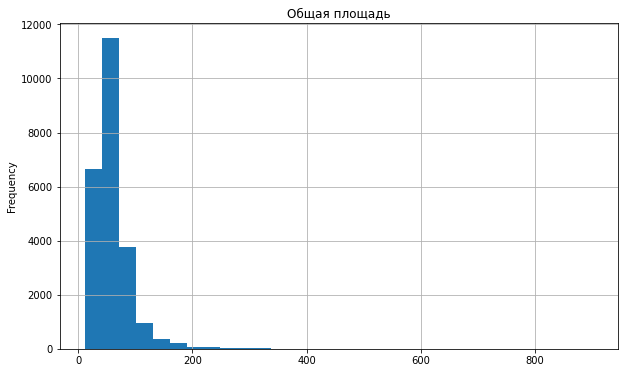

In [36]:
# Строим гистограмму по столбцу total_area
(
data['total_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Общая площадь', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Сложно судить о распределении на такой гистограмме, необходимо избавиться от выбросов, ограничив ось Х с помощью функций `bottom` и `top`:

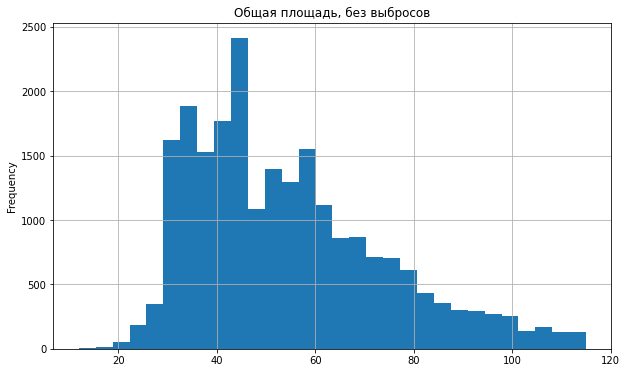

In [37]:
# Строим гистограмму по столбцу total_area
(
data['total_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Общая площадь, без выбросов', # название графика
        figsize=(10, 6), # размер графика
        range=(bottom('total_area'), top('total_area')), # ограничения по оси Х
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Другое дело, теперь из гистограммы видно, что распределение имеет три ярко выраженных пика на 36, 46 и 58 кв. метрах, значит распределение не похоже на нормальное распределение.

Посмотрим на гистограмму жилой площади `living_area`:

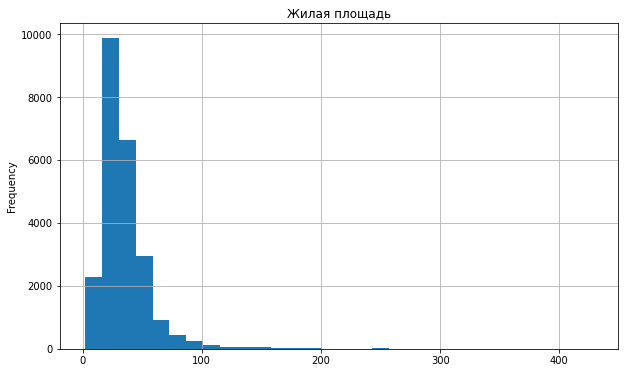

In [38]:
# Строим гистограмму по столбцу living_area
(
data['living_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Жилая площадь', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Также необходимо избавиться от выбросов:

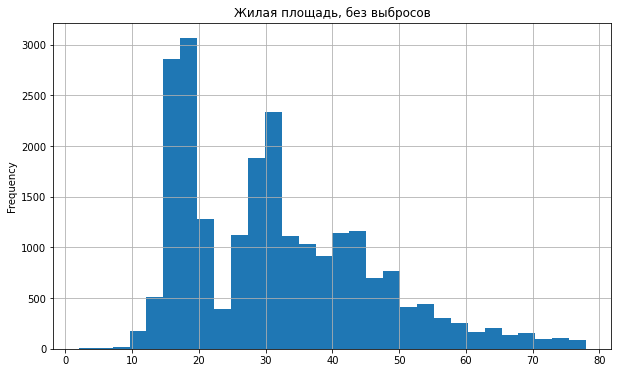

In [39]:
# Строим гистограмму по столбцу living_area
(
data['living_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Жилая площадь, без выбросов', # название графика
        figsize=(10, 6), # размер графика
        range=(bottom('living_area'), top('living_area')), # ограничения по оси Х
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Как и у общей площади не наблюдается нормальное распределение, есть три пика на 18, 30 и 42 кв. метрах.

Посмотрим на гистограмму площади кухни `kitchen_area` (есть значения площади равные нулю, от них избавимся сразу):

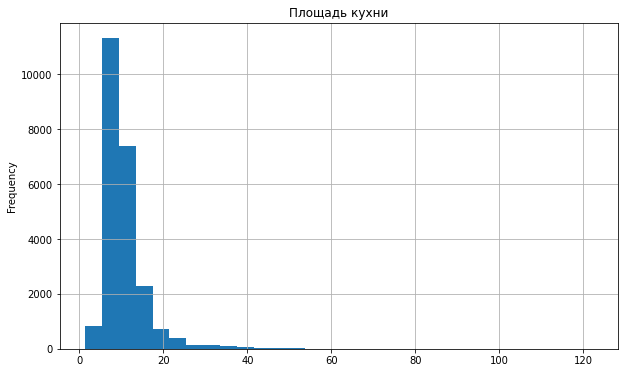

In [40]:
# Строим гистограмму по столбцу kitchen_area
(
data.query('kitchen_area > 0')['kitchen_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Площадь кухни', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Необходимо избавиться от выбросов:

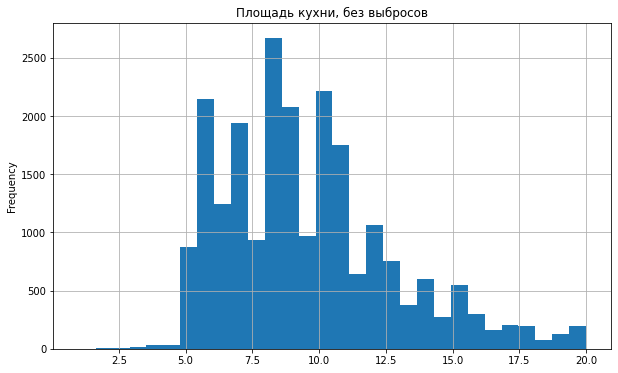

In [41]:
# Строим гистограмму по столбцу kitchen_area
(
data.query('kitchen_area > 0')['kitchen_area']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Площадь кухни, без выбросов', # название графика
        figsize=(10, 6), # размер графика
        range=(bottom('kitchen_area'), top('kitchen_area')), # ограничения по оси Х
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Отсутсвие нормального распределения повторилось и тут, есть много пиков.

Посмотрим на гистограмму цены `last_price`:

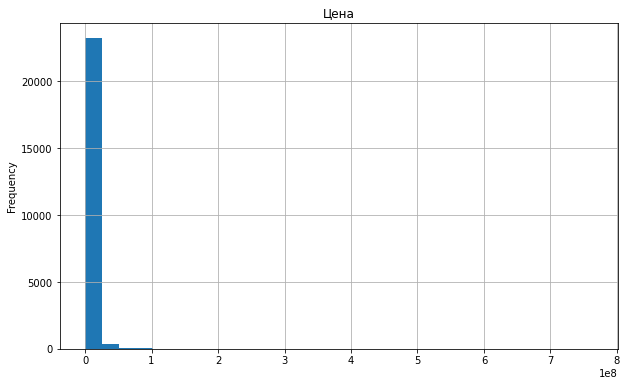

In [42]:
# Строим гистограмму по столбцу last_price
(
data['last_price']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Цена', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

И в столбце с ценой не обошлось без значительных выбросов, избавимся от них и построим гистограмму снова:

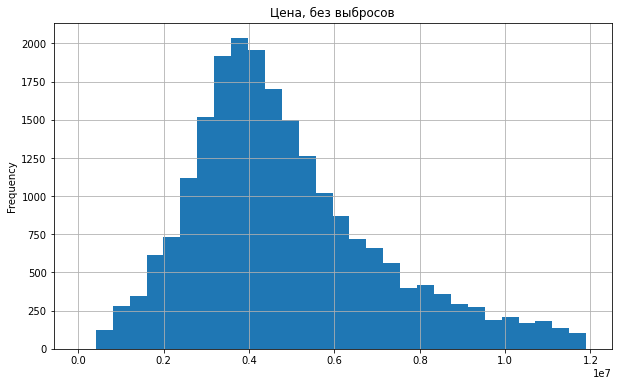

In [43]:
# Строим гистограмму по столбцу last_price
(
data['last_price']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Цена, без выбросов', # название графика
        figsize=(10, 6), # размер графика
        range=(bottom('last_price'), top('last_price')), # ограничения по оси Х
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Цена имеет нормальное распределение распределение со смещенным немного влево пиком, равным примерно 4 млн. руб.

Посмотрим на гистограмму количества комнат `rooms`:

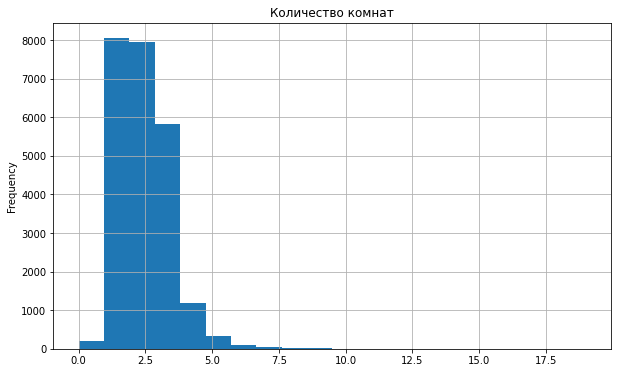

In [44]:
# Строим гистограмму по столбцу rooms
(
data['rooms']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Количество комнат', # название графика
        figsize=(10, 6), # размер графика
        bins=20, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Столбец с количеством комнат `rooms` имеет нормальное распределение. Видно, что преобладают 1 и 2 комнатные квартиры в равной степени, это объясняет несколько пиков в распределениях `total_area` и `living_area`.

Посмотрим на гистограмму высоты потолка `ceiling_height`:

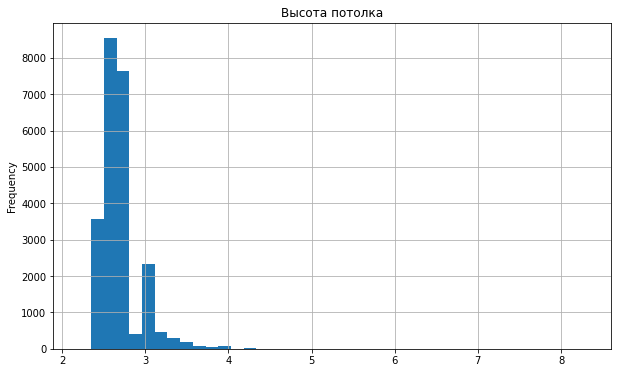

In [45]:
# Строим гистограмму по столбцу ceiling_height
(
data['ceiling_height']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Высота потолка', # название графика
        figsize=(10, 6), # размер графика
        bins=40, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Даже с выбросами видно, что нормального распределения нет.

Посмотрим на гистограмму этажа `floor`:

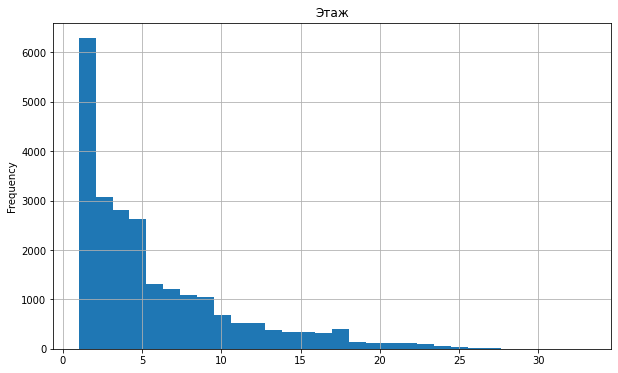

In [46]:
# Строим гистограмму по столбцу floor
(
data['floor']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Этаж', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

По гистограмме видно, что чем выше этаж, тем меньше квартир.

Посмотрим на гистограмму типа этажа `category_floor`:

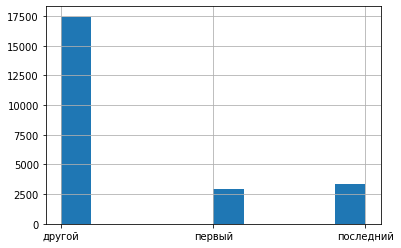

In [47]:
# было
data['category_floor'].hist()
plt.show()

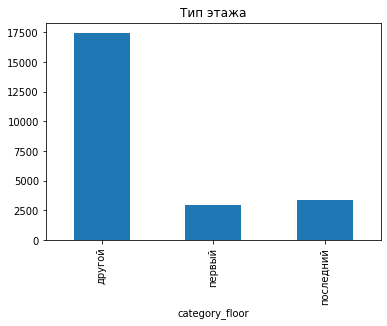

In [48]:
# сделал
(
data.groupby('category_floor')['category_floor'].count()
    .plot(
        kind='bar'           
    )
    .set_title("Тип этажа")
)
plt.show()

Из гистограммы видно, что, если рассматривать категории этажей, то первый наоборот самый редкий, хоть и квартир на 1 этаже больше чем на других этажах.

Посмотрим на гистограмму высоты дома `floors_total`:

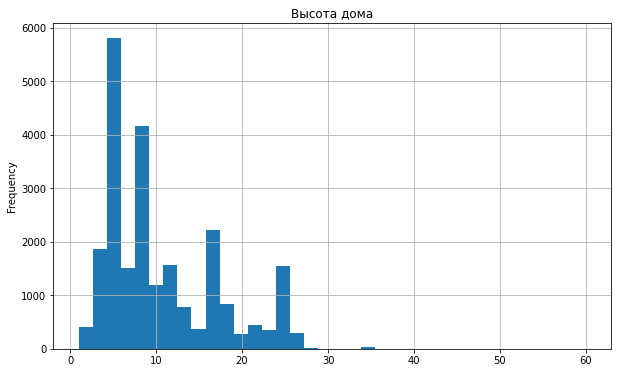

In [49]:
# Строим гистограмму по столбцу floors_total
(
data['floors_total']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Высота дома', # название графика
        figsize=(10, 6), # размер графика
        bins=len(data['floors_total'].unique()), # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Нормального распределения не видно, видно, что есть несколько пиков это 5, 9, 16 и 25 этажные дома.

Посмотрим на гистограмму расстояния до центра города `city_centers_nearest`:

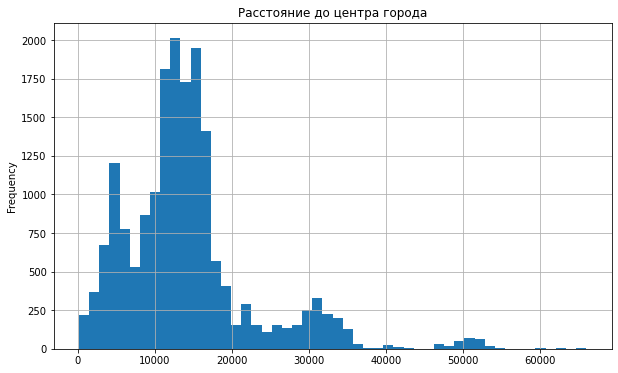

In [50]:
# Строим гистограмму по столбцу city_centers_nearest
(
data['city_centers_nearest']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Расстояние до центра города', # название графика
        figsize=(10, 6), # размер графика
        bins=50, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Даже с выбросами видно, что нет нормального распределения, есть несколько пиков: 5000 м., 12500 м. и несколько мелких пиков на 21500 м., 31000 м. и 51000 м. 

Глянем на гистограмму расстояния до юлижайшего аэропорта `airports_nearest`:

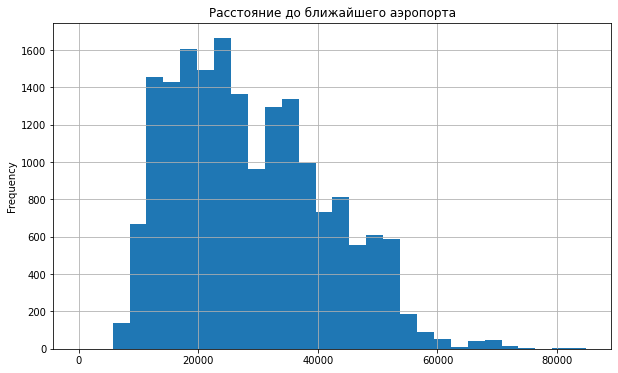

In [51]:
# Строим гистограмму по столбцу airports_nearest
(
data['airports_nearest']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Расстояние до ближайшего аэропорта', # название графика
        figsize=(10, 6), # размер графика
        bins=30, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Даже с выбросами видно, что нет нормального распределения, есть несколько пиков: 18000 м., 22000 м. и 36000 м.

Посмотрим на гистограмму расстояния до ближайшего парка `parks_nearest`:

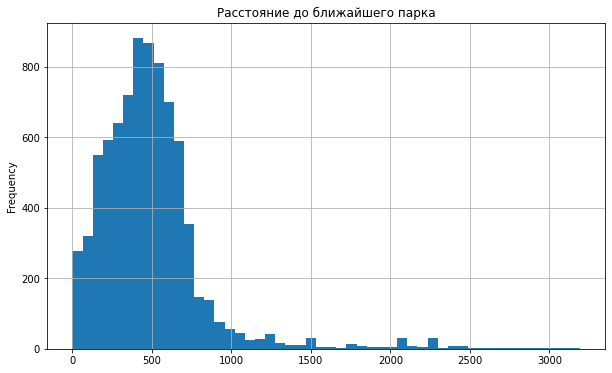

In [52]:
# Строим гистограмму по столбцу parks_nearest
(
data['parks_nearest']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Расстояние до ближайшего парка', # название графика
        figsize=(10, 6), # размер графика
        bins=50, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

Из гистограммы видно, что у расстояния до ближайшего парка нормальное распределение, пик находится примерно у 500 метров.

Посмотрим на гистограмму дня публикации объявления `weekday_exposition`:

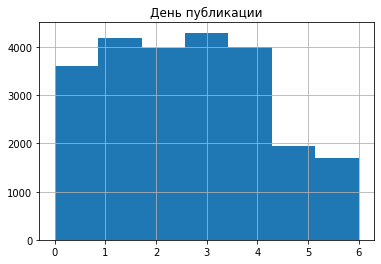

In [53]:
data['weekday_exposition'].hist(bins=7).set_title("День публикации")
plt.show()

По гистограмме виден определенный спад в публикациях объявлений в выходной день.

Посмотрим на гистограмму месяца публикации объявления `month_exposition`:

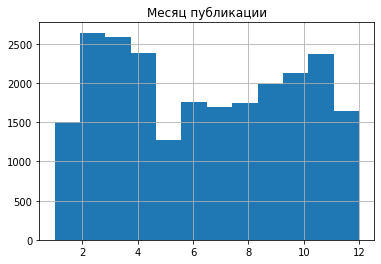

In [54]:
data['month_exposition'].hist(bins=12).set_title("Месяц публикации")
plt.show()

Из гистограммы видно, что всех больше объявлений публикуется в период с февраля по апрель, в январе, мае, летом и в декабре есть спад по количеству публикаций, а осенью с каждым месяцем объявлений публикуется все больше.

### Анализ быстроты продажи квартир

Посмотрим как быстро продавались вкартиры, изучив столбец `days_exposition`:

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

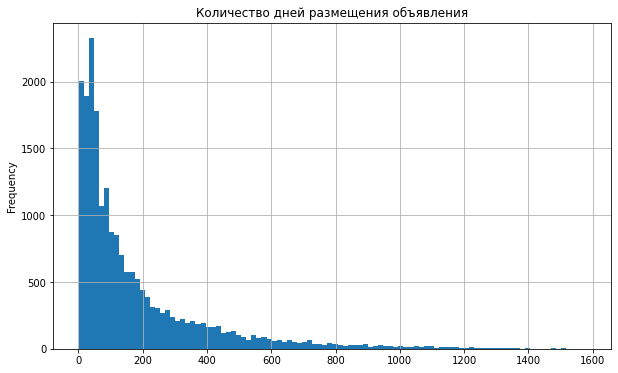

In [55]:
# Выведем сводную статистику с помощью метода describe
display(data['days_exposition'].describe())
# Строим гистограмму по столбцу last_price
(
data['days_exposition']
    .plot(
        kind='hist', # тип графика - гистограмма
        title='Количество дней размещения объявления',
        figsize=(10, 6), # размер графика
        bins=100, # количество корзин
        grid=True, # сетка
    )
)
plt.show()

По статистике и гистограмме видно, что продажа квартиры может занимать от 1 дня до 4,5 лет.

Медианное значение количества дней, которое "висело" объявление это 95 дней, т.е. как минимум половину квартири продали за 95 дней и меньше, а вот среднее значение дней которое "висело" объявление равно 181 дню, что потчи в два раза больше медианного, это говорит о том, что есть много объявлений которые "висели" слишком долго.

Продажи можно условно разделить на:
- быстрые продажи, те которые совершали меньше чем за 45 дней (первый квартиль);
- нормальные продажи, те которые совершали от 45 дней до 232 дней (межквартильный размах);
- необычно долгие, те которые совершали дольше 232 дней (ттретий квартиль).

### Анализ зависимости цены от различных параметров

Для дальнейшего анализа обновим переменную `data_analysis`, для того чтобы можно было избавляться от выбросов:

In [56]:
data_analysis = data.describe()

Для дальнейшего анализа факторов, влияющих на общую цену `last_price`, срежем выбросы из исходного датасета и поместим его в переменную `data_analysis_price`:

In [57]:
data_analysis_price = (data
    # уберем выбросы в столбцах last_price, total_area, price_m2, living_area, kitchen_area, оставив только нормальные 
    # значения, убрав выбросы с помощью функции top и bottom 
    .query(' \
        @bottom("last_price") < last_price < @top("last_price") \
        and (@bottom("total_area") < total_area < @top("total_area")) \
        and (@bottom("price_m2") < price_m2 < @top("price_m2")) \
        and (@bottom("living_area") < living_area < @top("living_area")) \
        and (@bottom("kitchen_area") < kitchen_area < @top("kitchen_area")) \
    ')
    # выбираем только столбцы, которые будут использовалься для анализа
    [['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'category_floor', \
    'weekday_exposition', 'month_exposition', 'year_exposition', 'price_m2', 'locality_name', 'city_сenters_nearest_km']]
)

Проверим сколько осталось строк от исходного датафрейма с помощью метода `info`:

In [58]:
data_analysis_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20415 entries, 1 to 23698
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   last_price               20415 non-null  int64   
 1   total_area               20415 non-null  float64 
 2   living_area              20415 non-null  float64 
 3   kitchen_area             20415 non-null  float64 
 4   rooms                    20415 non-null  int64   
 5   category_floor           20415 non-null  category
 6   weekday_exposition       20415 non-null  int64   
 7   month_exposition         20415 non-null  int64   
 8   year_exposition          20415 non-null  int64   
 9   price_m2                 20415 non-null  int64   
 10  locality_name            20415 non-null  category
 11  city_сenters_nearest_km  15297 non-null  float64 
dtypes: category(2), float64(4), int64(6)
memory usage: 1.8 MB


Осталось 20415 строк из 23699, что составляет 86,1 % от исходного датафрейма, это достаточно чтобы провести анализ.

Так как мы избавились от выбросов, будем использовать среднюю цену в дальнейшем анализе.

Теперь начнем анализировать от чего может зависеть цена `last_price`, посмотрим на ее зависимость от общей площади `total_area`, для этого посмотрим на коэффициент корреляции Пирсона (с выбросами и без):

In [59]:
print('Коэффициент корреляции общей площади и цены c выбросами:', 
    # создадим сводную таблицу по data столбцу с общецй площадью total_area, и посчитаем среднюю общую цену столбца last_price
    data.pivot_table(index='total_area', values='last_price').reset_index()['last_price']
    .corr(data.pivot_table(index='total_area', values='last_price').reset_index()['total_area']))
print('Коэффициент корреляции общей площади и цены без выбросов:', 
    # создадим сводную таблицу по data_analysis_price столбцу с общецй площадью total_area, и посчитаем среднюю общую цену столбца last_price
    data_analysis_price.pivot_table(index='total_area', values='last_price').reset_index()['last_price']
    .corr(data_analysis_price.pivot_table(index='total_area', values='last_price').reset_index()['total_area']))

Коэффициент корреляции общей площади и цены c выбросами: 0.7236662932505004
Коэффициент корреляции общей площади и цены без выбросов: 0.8816097270640674


По коэффициенту корреляции Пирсона видно, что есть очень высокая зависимость общей цены от общей площади, без выбросов этот коэффициент равен 0,88, посмотрия как это выглядит на графике:

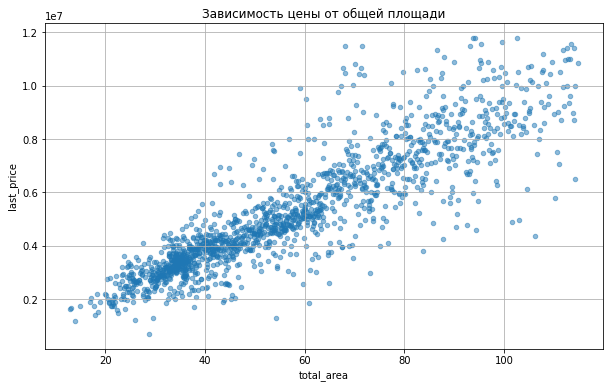

In [60]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с общей площадью total_area, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='total_area', values='last_price').reset_index()
    # построим график зависимости цены от общей площади
    .plot(
        x='total_area', # значения оси Х
        y='last_price', # значения оси У
        kind='scatter', # тип графика scatter
        alpha=0.5, # прозрачность точек 0,5
        title='Зависимость цены от общей площади', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

На графике видна зависимость цены `last_price` от общей площади `total_area`, чем больше площадь тем выше цена.

Теперь посмотрим на зависимость `last_price` от жилой площади `living_area`, для этого посмотрим на коэффициент корреляции Пирсона (с выбросами и без):

In [61]:
print('Коэффициент корреляции жилой площади и цены c выбросами:', 
    # создадим сводную таблицу по data столбцу с общецй площадью living_area, и посчитаем среднюю общую цену столбца last_price
    data.pivot_table(index='living_area', values='last_price').reset_index()['last_price']
    .corr(data.pivot_table(index='living_area', values='last_price').reset_index()['living_area']))
print('Коэффициент корреляции жилой площади и цены без выбросов:', 
    # создадим сводную таблицу по data_analysis_price столбцу с общецй площадью living_area, и посчитаем среднюю общую цену столбца last_price
    data_analysis_price.pivot_table(index='living_area', values='last_price').reset_index()['last_price']
    .corr(data_analysis_price.pivot_table(index='living_area', values='last_price').reset_index()['living_area']))

Коэффициент корреляции жилой площади и цены c выбросами: 0.6813191276629023
Коэффициент корреляции жилой площади и цены без выбросов: 0.7342254144177385


По коэффициенту корреляции Пирсона видно, что есть зависимость цены от жилой площади, но уже меньше чем, зависмость от общей площади, без выбросов этот коэффициент равен 0,73, посмотрим как это выглядит на графике:

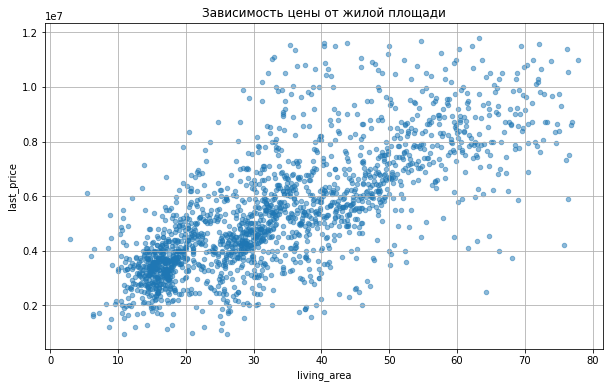

In [62]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с жилой площадью living_area, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='living_area', values='last_price').reset_index()
    # построим график зависимости цены от жилой площади
    .plot(
        x='living_area', # значения оси Х
        y='last_price', # значения оси У
        kind='scatter', # тип графика scatter
        alpha=0.5, # прозрачность точек 0,5
        title='Зависимость цены от жилой площади', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

Действительно разброс точек побольше, чем в прошлом графике, но все равно видна тенденция к росту цены при увеличении жилой площади.

Теперь посмотрим на зависимость `last_price` от площади кухни `kitchen_area`, для этого посмотрим на коэффициент корреляции Пирсона (с выбросами и без):

In [63]:
print('Коэффициент корреляции площади кухни и цены c выбросами:', 
    # создадим сводную таблицу по data по столбцу с площадью кухни kitchen_area, и посчитаем среднюю общую цену столбца last_price
    data.pivot_table(index='kitchen_area', values='last_price').reset_index()['last_price']
    .corr(data.pivot_table(index='kitchen_area', values='last_price').reset_index()['kitchen_area']))
print('Коэффициент корреляции площади кухни и цены без выбросов:', 
    # создадим сводную таблицу по data_analysis_price по столбцу с площадью кухни kitchen_area, и посчитаем среднюю общую цену столбца last_price
    data_analysis_price.pivot_table(index='kitchen_area', values='last_price').reset_index()['last_price']
    .corr(data_analysis_price.pivot_table(index='kitchen_area', values='last_price').reset_index()['kitchen_area']))

Коэффициент корреляции площади кухни и цены c выбросами: 0.5813715665331516
Коэффициент корреляции площади кухни и цены без выбросов: 0.5808032865832751


Интересно с выбросами коэффициент корреляции Пирсона даже немного больше, но все равно построим график рассеяния:

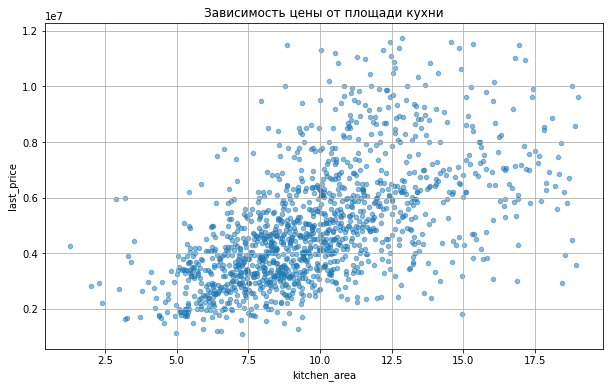

In [64]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с площадью кухни kitchen_area, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='kitchen_area', values='last_price').reset_index()
    # построим график зависимости цены от площади кухни
    .plot(
        x='kitchen_area', # значения оси Х
        y='last_price', # значения оси У
        kind='scatter', # тип графика scatter
        alpha=0.5, # прозрачность точек 0,5
        title='Зависимость цены от площади кухни', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

Разброс еще больше, чем у зависимости цены от жилой площади, но в целом есть рост цены от площади кухни.

Посмотрим зависит ли цена `last_price` от количества комнат `rooms`, для этого опять посмотриv на коэффициент корреляции Пирсона (с выбросами и без):

In [65]:
print('Коэффициент корреляции количества комнат и цены c выбросами:', 
    # создадим сводную таблицу по data по столбцу с количеством комнат rooms, и посчитаем среднюю общую цену столбца last_price
    data.pivot_table(index='rooms', values='last_price').reset_index()['last_price']
    .corr(data.pivot_table(index='rooms', values='last_price').reset_index()['rooms']))
print('Коэффициент корреляции количества комнат и цены без выбросов:', 
    # создадим сводную таблицу по data_analysis_price по столбцу с количеством комнат rooms, и посчитаем среднюю общую цену столбца last_price
    data_analysis_price.pivot_table(index='rooms', values='last_price').reset_index()['last_price']
    .corr(data_analysis_price.pivot_table(index='rooms', values='last_price').reset_index()['rooms']))

Коэффициент корреляции количества комнат и цены c выбросами: 0.2732803952266635
Коэффициент корреляции количества комнат и цены без выбросов: 0.986046748627764


Без выбросов коэффициент корреляции Пирсона почти единица, это очень хороший показатель, посмотрим на график:

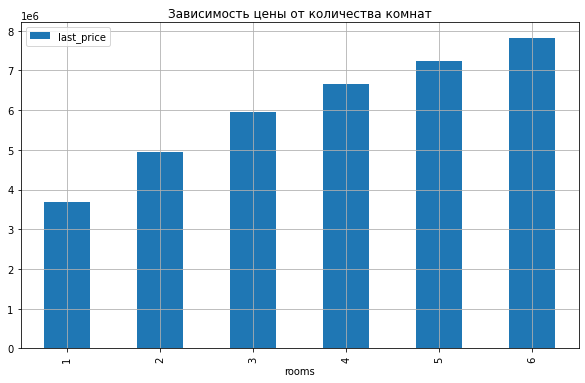

In [66]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с количеством комнат rooms, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='rooms', values='last_price').reset_index()
    # построим график зависимости цены от количества комнат
    .plot(
        x='rooms', # значения оси Х
        y='last_price', # значения оси У
        kind='bar', # тип графика bar
        title='Зависимость цены от количества комнат', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

Наблюдается почти линейная зависимость цены `last_price` от количества комнат `rooms`. 

Теперь посмотрим на зависимость цены `last_price` от категории этажа `category_floor`, для этого построим график:

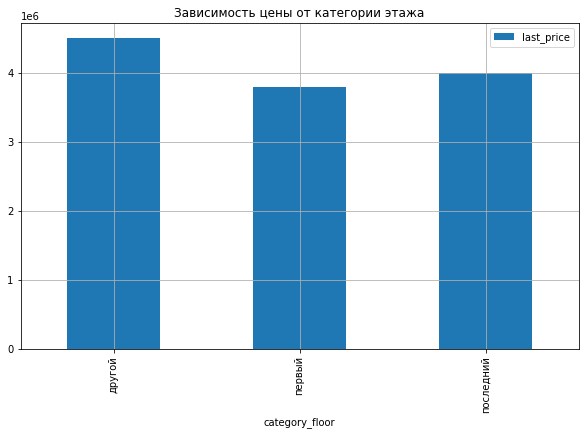

In [67]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с количеством комнат rooms, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='category_floor', values='last_price', aggfunc='median').reset_index()
    # построим график зависимости цены от категирии этажа
    .plot(
        x='category_floor', # значения оси Х
        y='last_price', # значения оси У
        kind='bar', # тип графика bar
        title='Зависимость цены от категории этажа', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

Из графика видно, что квартиры на первом этаже в среднем дешевле чем на последнем, а квартиры на последнем этаже дешевле чем, на других этажах.

Теперь посмотрим на зависимость цены `last_price` от дня публикации объявления `weekday_exposition`, для этого построим график:

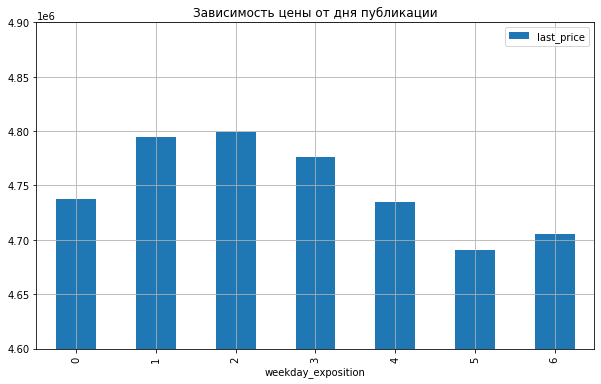

In [68]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с днем публикации weekday_exposition, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='weekday_exposition', values='last_price').reset_index()
    # построим график зависимости цены от дня публикации
    .plot(
        x='weekday_exposition', # значения оси Х
        y='last_price', # значения оси У
        kind='bar', # тип графика bar
        ylim=(4.6e6, 4.9e6), # ограничения по оси Y
        title='Зависимость цены от дня публикации', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

Какой-то определенной зависимости цены `last_price` от дня публикации объявления `weekday_exposition` не наблюдается.

Теперь посмотрим на зависимость цены `last_price` от месяца публикации объявления `month_exposition`, для этого построим график:

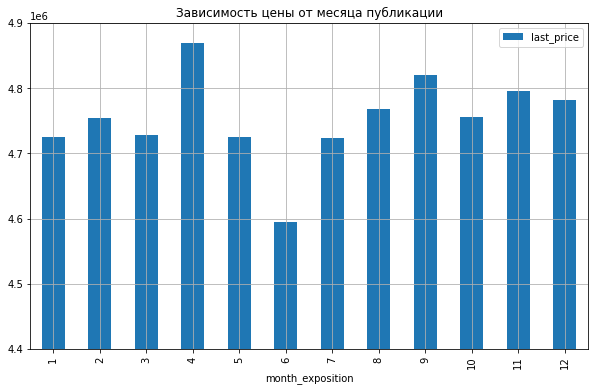

In [69]:
(
# создадим сводную таблицу по data_analysis_price по столбцу с месяцем публикации month_exposition, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='month_exposition', values='last_price').reset_index()
    # построим график зависимости цены от месяца публикации
    .plot(
        x='month_exposition', # значения оси Х
        y='last_price', # значения оси У
        kind='bar', # тип графика bar
        ylim=(4.4e6, 4.9e6), # ограничения по оси Y
        title='Зависимость цены от месяца публикации', #название графика
        figsize=(10, 6), # размер графика
        grid=True, # сетка
    )
)
plt.show()

По графику не видно какой-то определенной зависимости, но можно отметить пару интересных моментов:
- в июне в среднем стоимость квартиры ниже;
- в апреле в среднем самая высокая цена;
- во второй половине года цены немного выше, чем в первой (если не смотреть на апрель).

Теперь посмотрим на зависимость цены `last_price` от года публикации объявления `year_exposition`, для этого построим график и посмотрим на количество объявлений по годам:

,last_price
year_exposition,
2014,78
2015,954
2016,2394
2017,7053
2018,7465
2019,2471


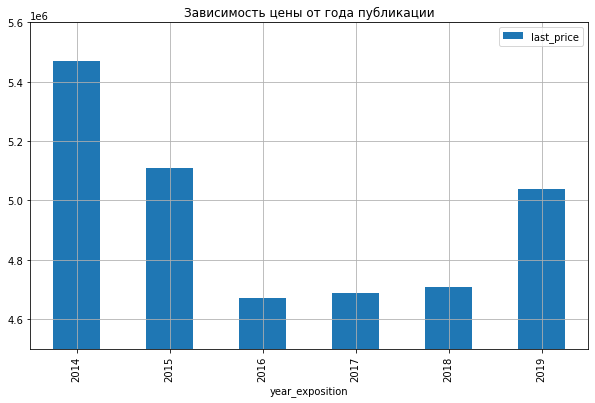

In [70]:
# создадим сводную таблицу по data_analysis_price по столбцу с годом публикации month_exposition, и посчитаем количество объявлений методом count столбца last_price
display(data_analysis_price.pivot_table(index='year_exposition', values='last_price', aggfunc='count')
       .style.set_caption('Количество объявлений по годам'))
(
# создадим сводную таблицу по data_analysis_price по столбцу с годом публикации month_exposition, и посчитаем среднюю общую цену столбца last_price
data_analysis_price.pivot_table(index='year_exposition', values='last_price').reset_index()
    # построим график зависимости цены от года публикации
    .plot(
        x='year_exposition', # значения оси Х
        y='last_price', # значения оси У
        kind='bar', # тип графика bar
        ylim=(4.5e6, 5.6e6), # ограничения по оси Y
        title='Зависимость цены от года публикации', #название графика
        figsize=(10, 6), # размер графика
        grid=True # сетка
    )
)
plt.show()

По таблице видно, что в 2014 и 2015 было мало объявлений по сравнению с другими годами и если их отбросить, то видна тенденция к повышению средней цены с годом публикации, а в 2019 году произошел резкий скачок цены.

### Анализ цены одного квадратного метра в разных населенных пунктах

Посмотрим какая средняя цена за кв. метр недвижимости в 10 населённых пунктах с наибольшим числом объявлений:

```
# Было
(
data_analysis_price
    # создадим сводную таблицу по населенным пунктам locality_name, и посчитаем количество объявлений и 
    # среднюю цену за кв. метр price_m2
    .pivot_table(index='locality_name', values='price_m2', aggfunc=('count', 'mean'))
    # отсортируем по убыванию количества объявлений
    .sort_values(by='count', ascending=False)
    # округлим до ближайших значений с помощью round
    .round()    
    # сбросим индексы (создадим нумерованные индексы)
    .reset_index()
    # с помощью индексации выберем топ-10 населенных пунктов по количеству объявлений
    .loc[:9]
    # отсортируем по убыванию средней цены за кв. метр
    .sort_values(by='mean', ascending=False)
    # сбросим индексы
    .reset_index(drop=True)
    # отбросим дробную часть с помощью int
    .astype({'count': 'int', 'mean': 'int'})
    # переименуем названия столбцов
    .rename(columns = {'locality_name':'Населенный пункт', 'count':'Количество объявлений', 'mean':'Средняя цена за кв. метр, руб'})
    # название сводной таблицы
    .style.set_caption('Средняя цена за кв. метр по населенным пунктам')
)
```

,locality_name,count,mean
0,Санкт-Петербург,12954,104198
1,поселок Мурино,521,85037
2,поселок Шушары,429,78429
3,Всеволожск,381,66958
4,Колпино,331,75237
5,Пушкин,325,99929
6,поселок Парголово,318,90301
7,Гатчина,298,68907
8,деревня Кудрово,264,92746
9,Выборг,222,58202


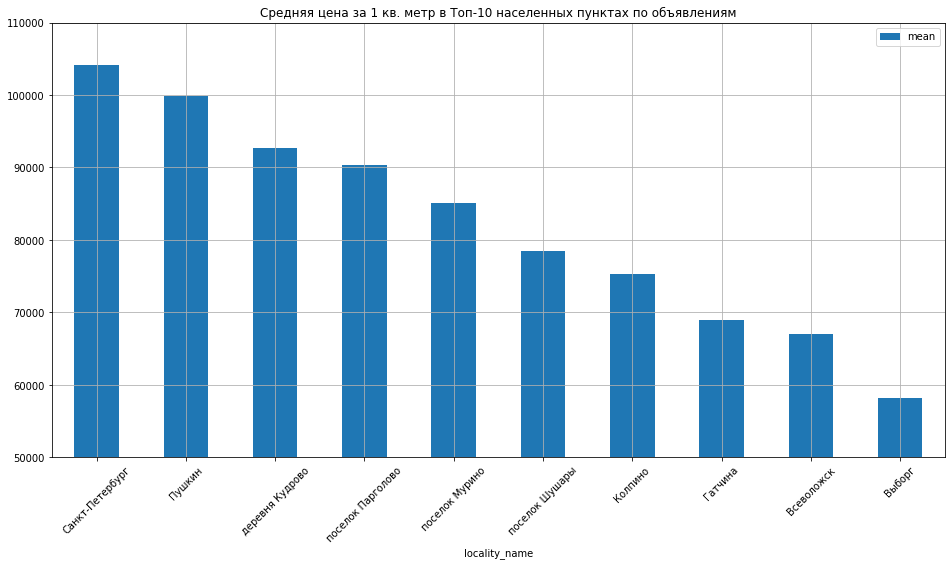

In [71]:
# Стало
top_10 = (
        # создадим сводную таблицу по населенным пунктам locality_name, и посчитаем среднюю цену за кв. метр price_m2
        data_analysis_price
            .pivot_table(
                index='locality_name', 
                values='price_m2',
                aggfunc=('count', 'mean')
            )
        .sort_values('count', ascending=False) # отсортируем по убыванию количества объявлений
        .iloc[:10] # с помощью индексации выберем топ-10 населенных пунктов по количеству объявлений
        .reset_index() # сбросим индексы (создадим нумерованные индексы)
        .round() # округлим до ближайших значений с помощью round
        .astype({'count': 'int', 'mean': 'int'}) # отбросим дробную часть с помощью int
)
display(top_10) # выведем таблицу
(
top_10.sort_values(by='mean', ascending=False)
    .plot(
        x='locality_name', # значения оси Х
        y='mean', # значения оси У
        kind='bar', # тип графика bar
        figsize=(16,8), # размер графика
        grid=True, # сетка
        rot=45, # поворот подписей оси Х
        ylim=(50000, 110000), # ограничения по оси Y
        title='Средняя цена за 1 кв. метр в Топ-10 населенных пунктах по объявлениям' #название графика
    )
)
plt.show()

По сводной таблице видно:
- что всех больше всех квартир продавалось в Санкт-Петербурге, там и оказалась самая высокая цена за кв. метр - 104,2 тыс. руб.;
- высокая цена (свыше 90 тыс. руб) оказалась в Пушкине, деревне Кудрово и поселке Парголово;
- самая низкая цена за кв. метр в Выборге - 58 тыс. руб.

In [72]:
(
data_analysis_price
    # создадим сводную таблицу по населенным пунктам locality_name, и посчитаем количество объявлений и 
    # среднюю цену за кв. метр price_m2
    .pivot_table(index='locality_name', values='price_m2', aggfunc=('mean'))
    # округлим до ближайших значений с помощью round
    .round()    
    # сбросим индексы (создадим нумерованные индексы)
    .reset_index()
    # отсортируем по убыванию средней цены за кв. метр
    .sort_values(by='price_m2', ascending=False)
    # сбросим индексы
    .reset_index(drop=True)
    # отбросим дробную часть с помощью int
    .astype({'price_m2': 'int'})
    # переименуем названия столбцов
    .rename(columns = {'locality_name':'Населенный пункт', 'price_m2':'Средняя цена за кв. метр, руб'})
)

,Населенный пункт,"Средняя цена за кв. метр, руб"
0,Санкт-Петербург,104198
1,Зеленогорск,102890
2,Сестрорецк,100801
3,поселок Лисий Нос,100660
4,Пушкин,99929
...,...,...
287,деревня Тихковицы,21126
288,поселок Плоское,20912
289,деревня Кисельня,20909
290,поселок Никольский,20848


По сводной таблице видно:
- самые высокие цены за кв. метр в Санкт-Перебурге, Зеленогорске и Сестрорецке (выше 100 тыс. руб.);
- самая дешевая недвижимость в деревне Кисельня и поселках Никольском и Серебрянском (ниже 21 тыс. руб.).

### Анализ цены квартир в Санкт-Петербурге в зависимости от расстояния до центра

Посмотрим как меняется средняя цена на квартиру в зависимости от расстояния до центра Санкт-Петербурга, для этого построим сводную таблицу:

In [73]:
price_saint_petersburg = (
    data_analysis_price
        # выбираем только строчки с Санкт-Перербургом
        .query('locality_name == "Санкт-Петербург"')
        # создадим сводную таблицу по расстоянию от центра city_сenters_nearest_km, и посчитаем среднюю цену за квартиру и количество объявлений
        .pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc=('count', 'mean'))
        # округлим до ближайших значений с помощью round
        .round()    
        # сбросим индексы (создадим нумерованные индексы)
        .reset_index()
        # отсортируем по возрастанию расстояния от центра
        .sort_values(by='city_сenters_nearest_km')
        # сбросим индексы
        .reset_index(drop=True)
        # отбросим дробную часть с помощью int
        .astype('int')
        # переименуем названия столбцов
        .rename(columns = {'mean':'mean_last_price'})
    )
price_saint_petersburg

,city_сenters_nearest_km,count,mean_last_price
0,0,7,7882857
1,1,80,8178912
2,2,142,7721908
3,3,206,7019354
4,4,390,7362771
5,5,497,7471873
6,6,354,6920234
7,7,268,6525626
8,8,430,6472997
9,9,501,5447395


Постром график для наглядности:

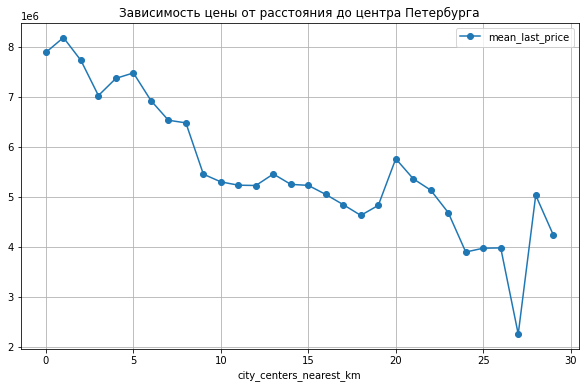

In [74]:
(
price_saint_petersburg
    .plot(
    x='city_сenters_nearest_km', # значения оси Х
    y='mean_last_price', # значения оси У
    style='o-',
    title='Зависимость цены от расстояния до центра Петербурга', #название графика
    figsize=(10, 6), # размер графика
    grid=True, # сетка
    )
)
plt.show()

На графике видно, что есть пару локальных пиков и оврагов, но в целом, чем дальше от центра Петербурга, тем цена за квартиру меньше.

## Общий вывод

В проекте "Исследование объявлений о продаже квартир" была проделана большая работа по изучению данных и их предобработке, а именно были:
- изучены данные с помощью методов .info(), .describe(), также изучены числовые данные представленные в виде гистограмм .hist();
- заполнены пропуски в тех столбцах, где это было возможно, максимально реальными значениями;
- обработаны аномальные значения в столбце `ceiling_height`;
- обработаны дубликаты в столбце `locality_name`;
- заменены типы данных.

Затем для дальнейшего анализа к начальному датасету были добавлены новые столбцы:
- цена одного квадратного метра;
- день недели, месяц и год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

Потом были проведены:
- анализ отдельных параметров;
- анализ быстроты продажи квартир;
- анализ зависимости цены от различных параметров;
- анализ цены одного квадратного метра в разных населенных пунктах;
- анализ цены квартир в Санкт-Петербурге в зависимости от расстояния до центра.

Также для анализа в проекте были написаны функции `top` и `bottom`, которые обрезают выбросы данных и оставляют только нормальные значения.

В ходе анализа отдельных параметров было выявлено, что:
- общая, жилая площадь и площадь кухни имеют несколько ярко выраженных пиков, скорее всего это характреные площади для 1, 2 и 3 комнатных квартир, которые преобладают в датасете;
- цена имеет нормальное распределение распределение со смещенным немного влево пиком, равным примерно 4 млн. руб.;
- больше всего квартир в объявлениях расположены на первом этаже, но при этом квартир расположенных на последних этажах больше;
- большинство квартир расположены в 5 и 9 этажках;
- большинство квартир расположены на расстоянии от 10 до 20 км от центра;
- основная масса квартир расположена на расстоянии до 50 км от аэтопорта;
- у большинства квартир, где есть рядом парк, то расстояние до него меньше километра;
- больше всего объявлений выкладывают в будние дни и в период с февраля по апрель, а также осенью.

Анализ быстроты продаж выявил, что:
- быстрые продажи, это те которые совершали меньше чем за 45 дней;
- необычно долгие, те которые совершали дольше 232 дней;
- Медианное значение количества дней, которое "висело" объявление - 95 дней.

Проведя анализ зависимости цены от различных параметров, можно сделать вывод, что:
- цена сильно зависит от общей площади, в меньшей степени от жилой площади и еще меньше от площяди кухни;
- от увеличения количества комнат цена определенно растет;
- квартиры на первом этаже дешевле, чем на последнем, но на последнем дешевле, чем на любом другом;
- от дня и месяца публикации у цены скорее нет зависимости, а вот от года публикации, если отбросить года с небольшим количеством объявлений, можно заметить тенденцию к росту цены с каждым годом;
- в Санкт-Петербурге чем ближе квартира к центру, тем она дороже.

Анализ цены одного квадратного метра в разных населенных пунктах показал, что:
- разброс цены от 20,5 тыс. руб. в поселоке Серебрянский до 104,2 тыс. руб. в Санкт-Петербурге;
- в 10 населенных пунктах с самым большим колличеством объявлений самая большая стоимость одного квадратного метра квартиры в Санкт-Петербурге (104,2 тыс. руб), а самая низкая стоимость в Выборге (58,2 тыс. руб.).